# Kleene's Theorem (Part 2)

## Learning Objectives
After completing this chapter, you will be able to:

* Create a regular expression that generates exactly the language recognized by a given NFA.

Again, we'll be creating some directed graphs, so we'll import the libraries for doing so.

In [2]:
from graphviz import Digraph, Source
from IPython.display import Image

## 1. Kleene's Theorem Review

Kleene's Theorem states that the three ways of defining a language enumerated below:

1. The set of all strings over an alphabet recognized by a DFA.
2. The set of all strings over an alphabet recognized by a NFA.
3. The set of all strings generated by a regular expression.

are equivalent. In Chapter 4, we proved that for any NFA there is a DFA that recognizes the same language, and so the sets of languages we can define using the first two methods are equal. In Chapter 5, we proved that for any regular expression we can create a DFA that recognizes exactly the language generated by that regular expression.

In this chapter, we complete the proof of Kleene's Theorem by proving the remaining connection - that for every NFA, there is a regular expression that generates exactly the language recognized by that NFA.

As with the major proofs from Chapter 4 and Chapter 5, this proof is constructive, and we will demonstrade how to construct an appropriate regular expression. The proof will be complete, but a bit more informal than you'd see in a precise writeup.

## 2. Generalized Nondeterministic Finite Automata (GNFAs)

Before we prove the final connection for Kleene's Theorem, we'll need to define another type of automaton - the *generalized nondeterministic finite automaton* or GNFA. Generalized nondeterministic finite automata are simply nondeterministic finite automata where the transition arrows may have any regular expression as labels, not just letters or the empty string $\lambda$. A GNFA moves along a transition arrow connecting two states by reading a block of symbols from the input which themselves constitute a string described by the regular expression on the arrow.

For example, one GNFA is:

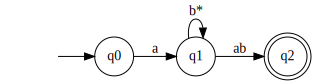

In [3]:
GNFA = Digraph()
GNFA.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
GNFA.node('', shape='none')
GNFA.edge('', 'q0')

# States
with GNFA.subgraph() as q0:
  q0.attr(rank='same')
  q0.node('q0', shape='circle')
with GNFA.subgraph() as q1:
  q1.attr(rank='same')
  q1.node('q1', shape='circle')
with GNFA.subgraph() as q2:
  q2.attr(rank='same')
  q2.node('q2', shape='doublecircle')

# Transitions
GNFA.edge('q0', 'q1', label='a')
GNFA.edge('q1', 'q1', label='b*')
GNFA.edge('q1', 'q2', label='ab')

Source(GNFA.source)

This GNFA would accept the string $abbbab$ by first reading $a$ and transitioning from $q0$ to $q1$, then reading $bbb$ (which is a string generated by the regular expression $b^*$) to transition from $q1$ to itself, and then finally reading $ab$ to transition from $q1$ to $q2$. Both the second and third transition arrows are not single letters, but regular expressions.

A GNFA is nondeterministic, and as a single letter is also a regular expression, the set of NFAs is contained within the set of GNFAs. Therefore, any language recognized by a NFA can be recognized by a GNFA, and we have the language containment:

$$\text{Recognized by a NFA} \subseteq \text{Recognized by a GNFA}$$

We'll complete Kleene's theorem by proving that the set of languages recognized by GNFAs is contained within the set of languages generated by regular expressions.

## 3. Recognized by a NFA $\subseteq$ Generated by a Regular Expression

We'll assume we start with a GNFA. The construction consists of four steps which if followed correctly and in order will provide a regular expression that generates exactly the language recognized by the given GNFA.

### 3.1. **Step 1** - Create a unique, unenterable initial state, and a unique, unleaveable accepting state.

The basic idea here is that if there is a set of initial states, we make them no longer initial states and add a new, unique initial state with empty string transitions from the new, unique initial state to the original initial states.

Similarly, if there is a set of final states, we make them no longer final states and add a new, unique final state with empty string transitions from the original final states to the new, unique final state.

I hope you'll agree it's clear this doesn't alter the set of strings accepted by the DFA.

### 3.2. **Step 2** - One by one, in any order, bypass and eliminate all the non-initial and non-final states in the GNFA.

A state is bypassed by connecting each incoming edge with each outgoing edge. The label of each resultant edge is the concatenation of the label on the incoming edge with the label on the loop edge if there is one and the label on the outgoing edge.

For example, the idea here is that if you've got a GNFA like the one below, with states $q1$ through $q5$ and regular expression transition labels $r1$ through $r5$, we can just bypass this with a transition directly from state $q1$ to states $q3, q4$ and $q5$.

We start with the GNFA:

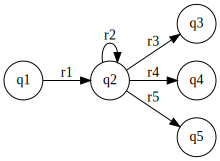

In [4]:
OGNFA = Digraph()
OGNFA.attr(rankdir='LR') # This specifies the diagram should go left to right

# States
with OGNFA.subgraph() as l1:
  l1.attr(rank='same')
  l1.node('q1', shape='circle')
with OGNFA.subgraph() as l2:
  l2.attr(rank='same')
  l2.node('q2', shape='circle')
with OGNFA.subgraph() as l3:
  l3.attr(rank='same')
  l3.node('q3', shape='circle')
  l3.node('q4', shape='circle')
  l3.node('q5', shape='circle')

# Transitions
OGNFA.edge('q1', 'q2', label='r1')
OGNFA.edge('q2', 'q2', label='r2')
OGNFA.edge('q2', 'q3', label='r3')
OGNFA.edge('q2', 'q4', label='r4')
OGNFA.edge('q2', 'q5', label='r5')

Source(OGNFA.source)

We reduce it to:

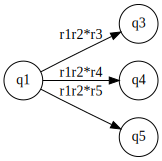

In [5]:
RGNFA = Digraph()
RGNFA.attr(rankdir='LR') # This specifies the diagram should go left to right

# States
with RGNFA.subgraph() as l1:
  l1.attr(rank='same')
  l1.node('q1', shape='circle')
with RGNFA.subgraph() as l2:
  l2.attr(rank='same')
  l2.node('q3', shape='circle')
  l2.node('q4', shape='circle')
  l2.node('q5', shape='circle')

# Transitions
RGNFA.edge('q1', 'q3', label='r1r2*r3')
RGNFA.edge('q1', 'q4', label='r1r2*r4')
RGNFA.edge('q1', 'q5', label='r1r2*r5')

Source(RGNFA.source)

Note that the strings that would transition from, say, $q1$ to $q3$ in the first GNFA are the same as those that would transition from $q1$ to $q3$ in the second. We've just eliminated the middleman state $q2$ in the second.

### 3.3. **Step 3** - When two states are joined by more than one edge going in the same direction, unify them by adding their labels.

For example, the GNFA:

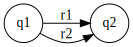

In [6]:
TwoGNFA = Digraph()
TwoGNFA.attr(rankdir='LR') # This specifies the diagram should go left to right

# States
with TwoGNFA.subgraph() as l1:
  l1.attr(rank='same')
  l1.node('q1', shape='circle')
with TwoGNFA.subgraph() as l2:
  l2.attr(rank='same')
  l2.node('q2', shape='circle')

# Transitions
TwoGNFA.edge('q1', 'q2', label='r1')
TwoGNFA.edge('q1', 'q2', label='r2')

Source(TwoGNFA.source)

Can be reduced to:

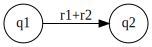

In [7]:
OneGNFA = Digraph()
OneGNFA.attr(rankdir='LR') # This specifies the diagram should go left to right

# States
with OneGNFA.subgraph() as l1:
  l1.attr(rank='same')
  l1.node('q1', shape='circle')
with OneGNFA.subgraph() as l2:
  l2.attr(rank='same')
  l2.node('q2', shape='circle')

# Transitions
OneGNFA.edge('q1', 'q2', label='r1+r2')

Source(OneGNFA.source)

This applies as well to loops on a single node as to transitions between two nodes.

### 3.4. **Step 4** - Finally, when all that is left is one edge from the unique initial state to the unique accepting state, the label on that edge is a regular expression that generates the same language as was recognized by the original GNFA.

This is it. You just apply Step 2 until only two nodes (the initial and accepting) left, and then you merge all the edges connecting them into one. The regular expression for that unique edge generates the language accepted by the original GNFA.

This procedure works. However, as mentioned above, to formally prove this we'd have to construct a more precise argument for why it must work and why it always works. We won't focus on that here, but complete formal proofs can be found in the reference textbooks referenced at the end of the chapter.

## 4. Regular Languages

Kleene's Theorem states that, for a given alphabet $\Sigma$,  the following sets are equal:

* The set of languages that can be recognized by a DFA.
* The set of languages that can be recognized by a NFA.
* The set of languages that can be generated by a regular expression.

Call these sets $DFA$, $NFA$, and $REG$, respectively. In this chapter we also introduced the generalized nondeterministic finite automaton. Call the set of language that can be recognized by a GNFA, well, $GNFA$.

Obviously $DFA \subseteq NFA$, as DFAs are NFAs. Obviously $NFA \subseteq GNFA$, as NFAs are GNFAs. We proved in Chapter 5 that $REG \subseteq DFA$. We proved in this chapter that $GNFA \subseteq REG$. So, we have the following containments:

$$DFA \subseteq NFA \subseteq GNFA \subseteq REG \subseteq DFA$$

The only way this is possible is if they're all equal. So, all these sets of languages are the same. We call this set the **regular languages**.

You may well ask whether all languages over an alphabet are regular. The answer, it turns out, is *no*, and we'll discuss this in the next chapter.

## 5. Practice Exercises

**Exercise 1**: For the GNFA below, follow the steps in this chapter to construct a regular expression generating the language recognized by the GNFA.

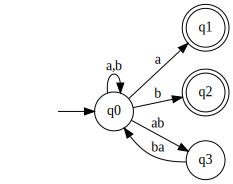

In [11]:
E1 = Digraph()
E1.attr(rankdir='LR') # This specifies the diagram should go left to right

# Start arrow
E1.node('', shape='none')
E1.edge('', 'q0')

# States
with E1.subgraph() as l0:
  l0.attr(rank='same')
  l0.node('q0', shape='circle')
with E1.subgraph() as l1:
  l1.attr(rank='same')
  l1.node('q1', shape='doublecircle')
  l1.node('q2', shape='doublecircle')
  l1.node('q3', shape='circle')

# Transitions
E1.edge('q0', 'q0', label='a,b')
E1.edge('q0', 'q1', label='a')
E1.edge('q0', 'q2', label='b')
E1.edge('q0', 'q3', label='ab')
E1.edge('q3', 'q0', label='ba')

Source(E1.source)

## 6. Further Reading

* [Introduction to Computer Theory](https://www.amazon.com/Introduction-Computer-Theory-Daniel-Cohen/dp/0471137723) (Second Edition) by Daniel I.A. Cohen

  *Chapter 7 - Kleene's Theorem*

* [Automata Theory, Languages, and Computation](https://www.amazon.com/Introduction-Automata-Theory-Languages-Computation/dp/0321462254) (Third Edition) by Hopcroft, Motwani, and Ullman

  *Section 3.2 - Finite Automata and Regular Expressions*

* [Introduction to the Theory of Computation](https://www.cengage.com/c/introduction-to-the-theory-of-computation-3e-sipser/9781133187790/) (Third Edition) by Michael Sipser
  
  *Section 1.2 - Nondeterminism,* *Section 1.3 - Regular Expressions*